In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
stroke=pd.read_csv('/content/drive/MyDrive/AVDS/Stroke_Prediction.csv')

In [ ]:
df=stroke.dropna()
df.isna().sum().sum()

0

In [ ]:
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0           0.0            1.0          Yes   
2     31112    Male  80.0           0.0            1.0          Yes   
3     60182  Female  49.0           0.0            0.0          Yes   
4      1665  Female  79.0           1.0            0.0          Yes   
5     56669    Male  81.0           0.0            0.0          Yes   
...     ...     ...   ...           ...            ...          ...   
3994   8009  Female  72.0           1.0            1.0          Yes   
3995  30961    Male  45.0           0.0            0.0          Yes   
3996  24201    Male  33.0           0.0            0.0          Yes   
3997  18032    Male  62.0           0.0            1.0          Yes   
3998  62396  Female  27.0           0.0            0.0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

**EXP 6**

In [ ]:
#display the dataset by gender
x=df.groupby('gender')['stroke']
x.count()

,stroke
gender,
Female,2221
Male,1580
Other,1


In [ ]:
x.value_counts()

gender  stroke
Female  0.0       2102
        1.0        119
Male    0.0       1492
        1.0         88
Other   0.0          1
Name: count, dtype: int64

In [ ]:
#display the dataset by work type
y=df.groupby('work_type')['stroke']
y.count()

,stroke
work_type,
Govt_job,475
Never_worked,16
Private,2209
Self-employed,600
children,502


In [ ]:
y.value_counts()

work_type      stroke
Govt_job       0.0        448
               1.0         27
Never_worked   0.0         16
Private        0.0       2083
               1.0        126
Self-employed  0.0        547
               1.0         53
children       0.0        501
               1.0          1
Name: count, dtype: int64

In [ ]:
#display the dataset with or without gender on whether they have ever married
z=df.groupby(['gender','ever_married'])
z.count()

id   age  hypertension  heart_disease  work_type  \
gender ever_married                                                       
Female No             725   725           725            725        725   
       Yes           1496  1496          1496           1496       1496   
Male   No             567   567           567            567        567   
       Yes           1013  1013          1013           1013       1013   
Other  No               1     1             1              1          1   

                     Residence_type  avg_glucose_level   bmi  smoking_status  \
gender ever_married                                                            
Female No                       725                725   725             725   
       Yes                     1496               1496  1496            1496   
Male   No                       567                567   567             567   
       Yes                     1013               1013  1013            1013   
Other  No                         1                  1     1               1   

                     stroke  
gender ever_married          
Female No               725  
       Yes             1496  
Male   No               567  
       Yes             1013  
Other  No                 1

In [ ]:
z.value_counts()

gender  ever_married  id     age   hypertension  heart_disease  work_type  Residence_type  avg_glucose_level  bmi   smoking_status   stroke
Female  No            77     13.0  0.0           0.0            children   Rural           85.81              18.6  Unknown          0.0       1
                      91     42.0  0.0           0.0            Private    Urban           98.53              18.5  never smoked     0.0       1
                      99     31.0  0.0           0.0            Private    Urban           108.89             52.3  Unknown          0.0       1
                      129    24.0  0.0           0.0            Private    Urban           97.55              26.2  never smoked     0.0       1
                      187    20.0  0.0           0.0            Private    Rural           84.07              27.6  smokes           0.0       1
                                                                                                                                              ..
Male    Yes           72642  67.0  0.0           0.0            Govt_job   Urban           67.79              26.0  formerly smoked  0.0       1
                      72776  26.0  0.0           0.0            Govt_job   Urban           94.24              29.2  formerly smoked  0.0       1
                      72824  46.0  0.0           0.0            Private    Rural           59.05              28.3  formerly smoked  0.0       1
                      72882  47.0  0.0           0.0            Private    Rural           75.30              25.0  formerly smoked  0.0       1
Other   No            56156  26.0  0.0           0.0            Private    Rural           143.33             22.4  formerly smoked  0.0       1
Name: count, Length: 3802, dtype: int64

**EXP 7**

In [ ]:
# plot the percentage count of male and femaleas bar graph
gender_counts = df['gender'].value_counts()
gender_percentage = gender_counts / gender_counts.sum() * 100

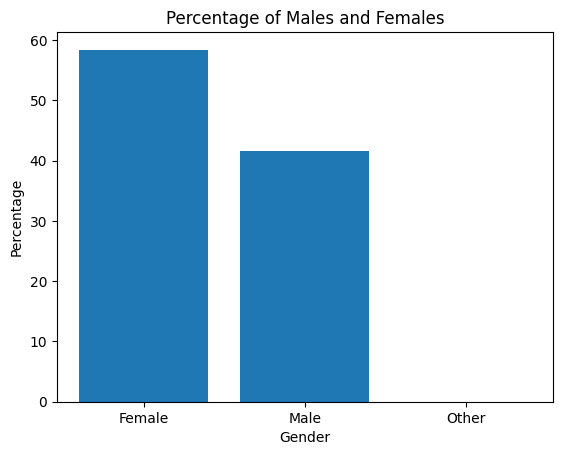

In [ ]:
import matplotlib.pyplot as plt
plt.bar(gender_percentage.index, gender_percentage.values)
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.title("Percentage of Males and Females")
plt.show()

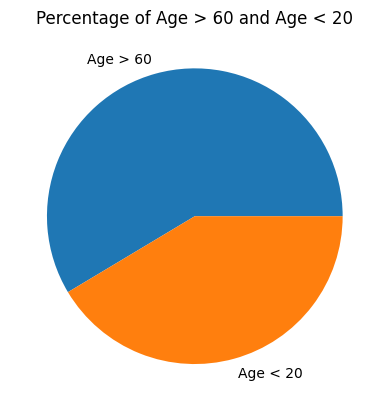

In [ ]:
#plot the piechart showing percentage of age seniorcitizen and younger ones
import matplotlib.pyplot as plt
age_greater_than_60 = df[df['age'] > 60]['age'].count()
age_less_than_20 = df[df['age'] < 20]['age'].count()

labels = ['Age > 60', 'Age < 20']
sizes = [age_greater_than_60, age_less_than_20]

plt.pie(sizes, labels=labels)
plt.title('Percentage of Age > 60 and Age < 20')

plt.show()

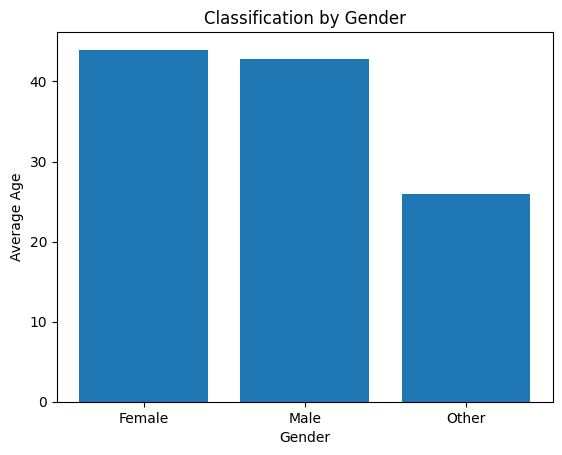

In [ ]:
#plot the bar graph showing classification by gender

import matplotlib.pyplot as plt
age_by_class = df.groupby('gender')['age'].mean()

plt.bar(age_by_class.index, age_by_class.values)
plt.xlabel("Gender")
plt.ylabel("Average Age")
plt.title("Classification by Gender")
plt.show()

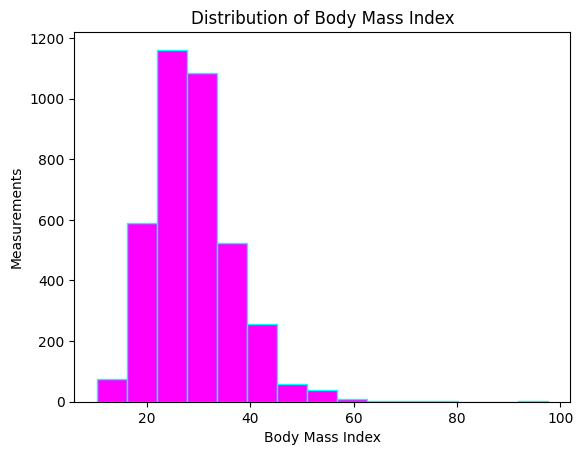

In [ ]:
#Design Histogram to analize distribution of body mass index
import matplotlib.pyplot as plt
import pandas as pd

plt.hist(df['bmi'], bins=15, color='magenta',edgecolor='cyan')
plt.xlabel("Body Mass Index")
plt.ylabel("Measurements")
plt.title("Distribution of Body Mass Index")

plt.show() # Execute the code yourself to see the output

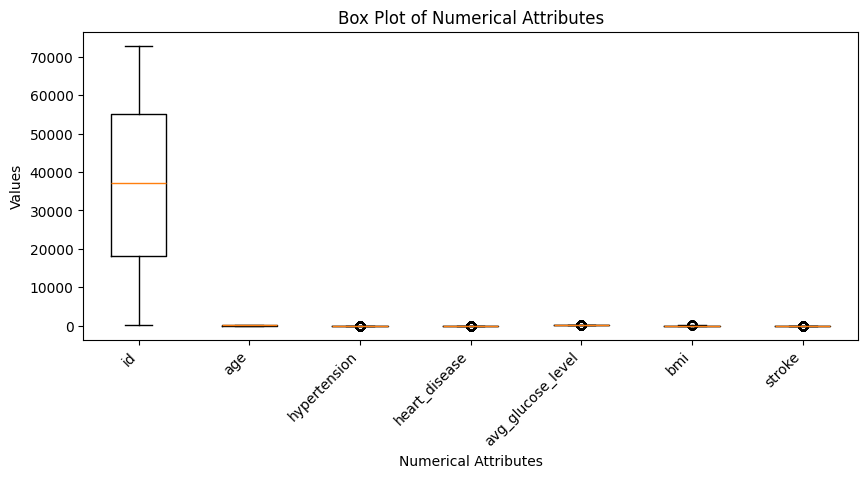

In [ ]:
#plot a box plot for all the numerical attributes
import matplotlib.pyplot as plt
import pandas as pd

numerical_attributes = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 4))
plt.boxplot(numerical_attributes.values, labels=numerical_attributes.columns)
plt.xlabel("Numerical Attributes")
plt.ylabel("Values")
plt.title("Box Plot of Numerical Attributes")
plt.xticks(rotation=45, ha='right')

plt.show()

**EXP 8**

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['stroke']= label_encoder.fit_transform(df['stroke'])

<ipython-input-31-7ee797ba449a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stroke']= label_encoder.fit_transform(df['stroke'])


In [ ]:
df['hypertension']= label_encoder.fit_transform(df['hypertension'])
df['gender']= label_encoder.fit_transform(df['gender'])
df['heart_disease']= label_encoder.fit_transform(df['heart_disease'])
df['ever_married']= label_encoder.fit_transform(df['ever_married'])
df['work_type']= label_encoder.fit_transform(df['work_type'])
df['Residence_type']= label_encoder.fit_transform(df['Residence_type'])
df['smoking_status']= label_encoder.fit_transform(df['smoking_status'])

<ipython-input-18-465852610517>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hypertension']= label_encoder.fit_transform(df['hypertension'])
<ipython-input-18-465852610517>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender']= label_encoder.fit_transform(df['gender'])
<ipython-input-18-465852610517>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [ ]:
X = df.drop("stroke",axis=1)   #Feature Matrix
y = df["stroke"]

In [ ]:
y.head()

,stroke
0,1
2,1
3,1
4,1
5,1


In [ ]:
X.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1


In [ ]:
#train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((2661, 11), (1141, 11))

In [ ]:
X.corr()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
id,1.000000,0.027491,-0.008327,-0.009370,0.000167,0.001152,-0.003482,0.007059,-0.009892,-0.018046,0.001113
gender,0.027491,1.000000,-0.025702,0.023947,0.087789,-0.034865,0.059606,0.003649,0.066846,-0.016085,-0.055924
age,-0.008327,-0.025702,1.000000,0.275329,0.267499,0.673886,-0.361543,0.011373,0.235274,0.318140,0.272167
hypertension,-0.009370,0.023947,0.275329,1.000000,0.116010,0.158819,-0.050605,0.015752,0.180743,0.164669,0.111796
heart_disease,0.000167,0.087789,0.267499,0.116010,1.000000,0.115411,-0.027561,0.000939,0.168357,0.041948,0.052135
ever_married,0.001152,-0.034865,0.673886,0.158819,0.115411,1.000000,-0.353376,0.006930,0.147509,0.325148,0.256887
work_type,-0.003482,0.059606,-0.361543,-0.050605,-0.027561,-0.353376,1.000000,-0.006758,-0.042837,-0.290781,-0.315326
Residence_type,0.007059,0.003649,0.011373,0.015752,0.000939,0.006930,-0.006758,1.000000,-0.009474,0.003778,0.017138
avg_glucose_level,-0.009892,0.066846,0.235274,0.180743,0.168357,0.147509,-0.042837,-0.009474,1.000000,0.177012,0.068790
bmi,-0.018046,-0.016085,0.318140,0.164669,0.041948,0.325148,-0.290781,0.003778,0.177012,1.000000,0.227643


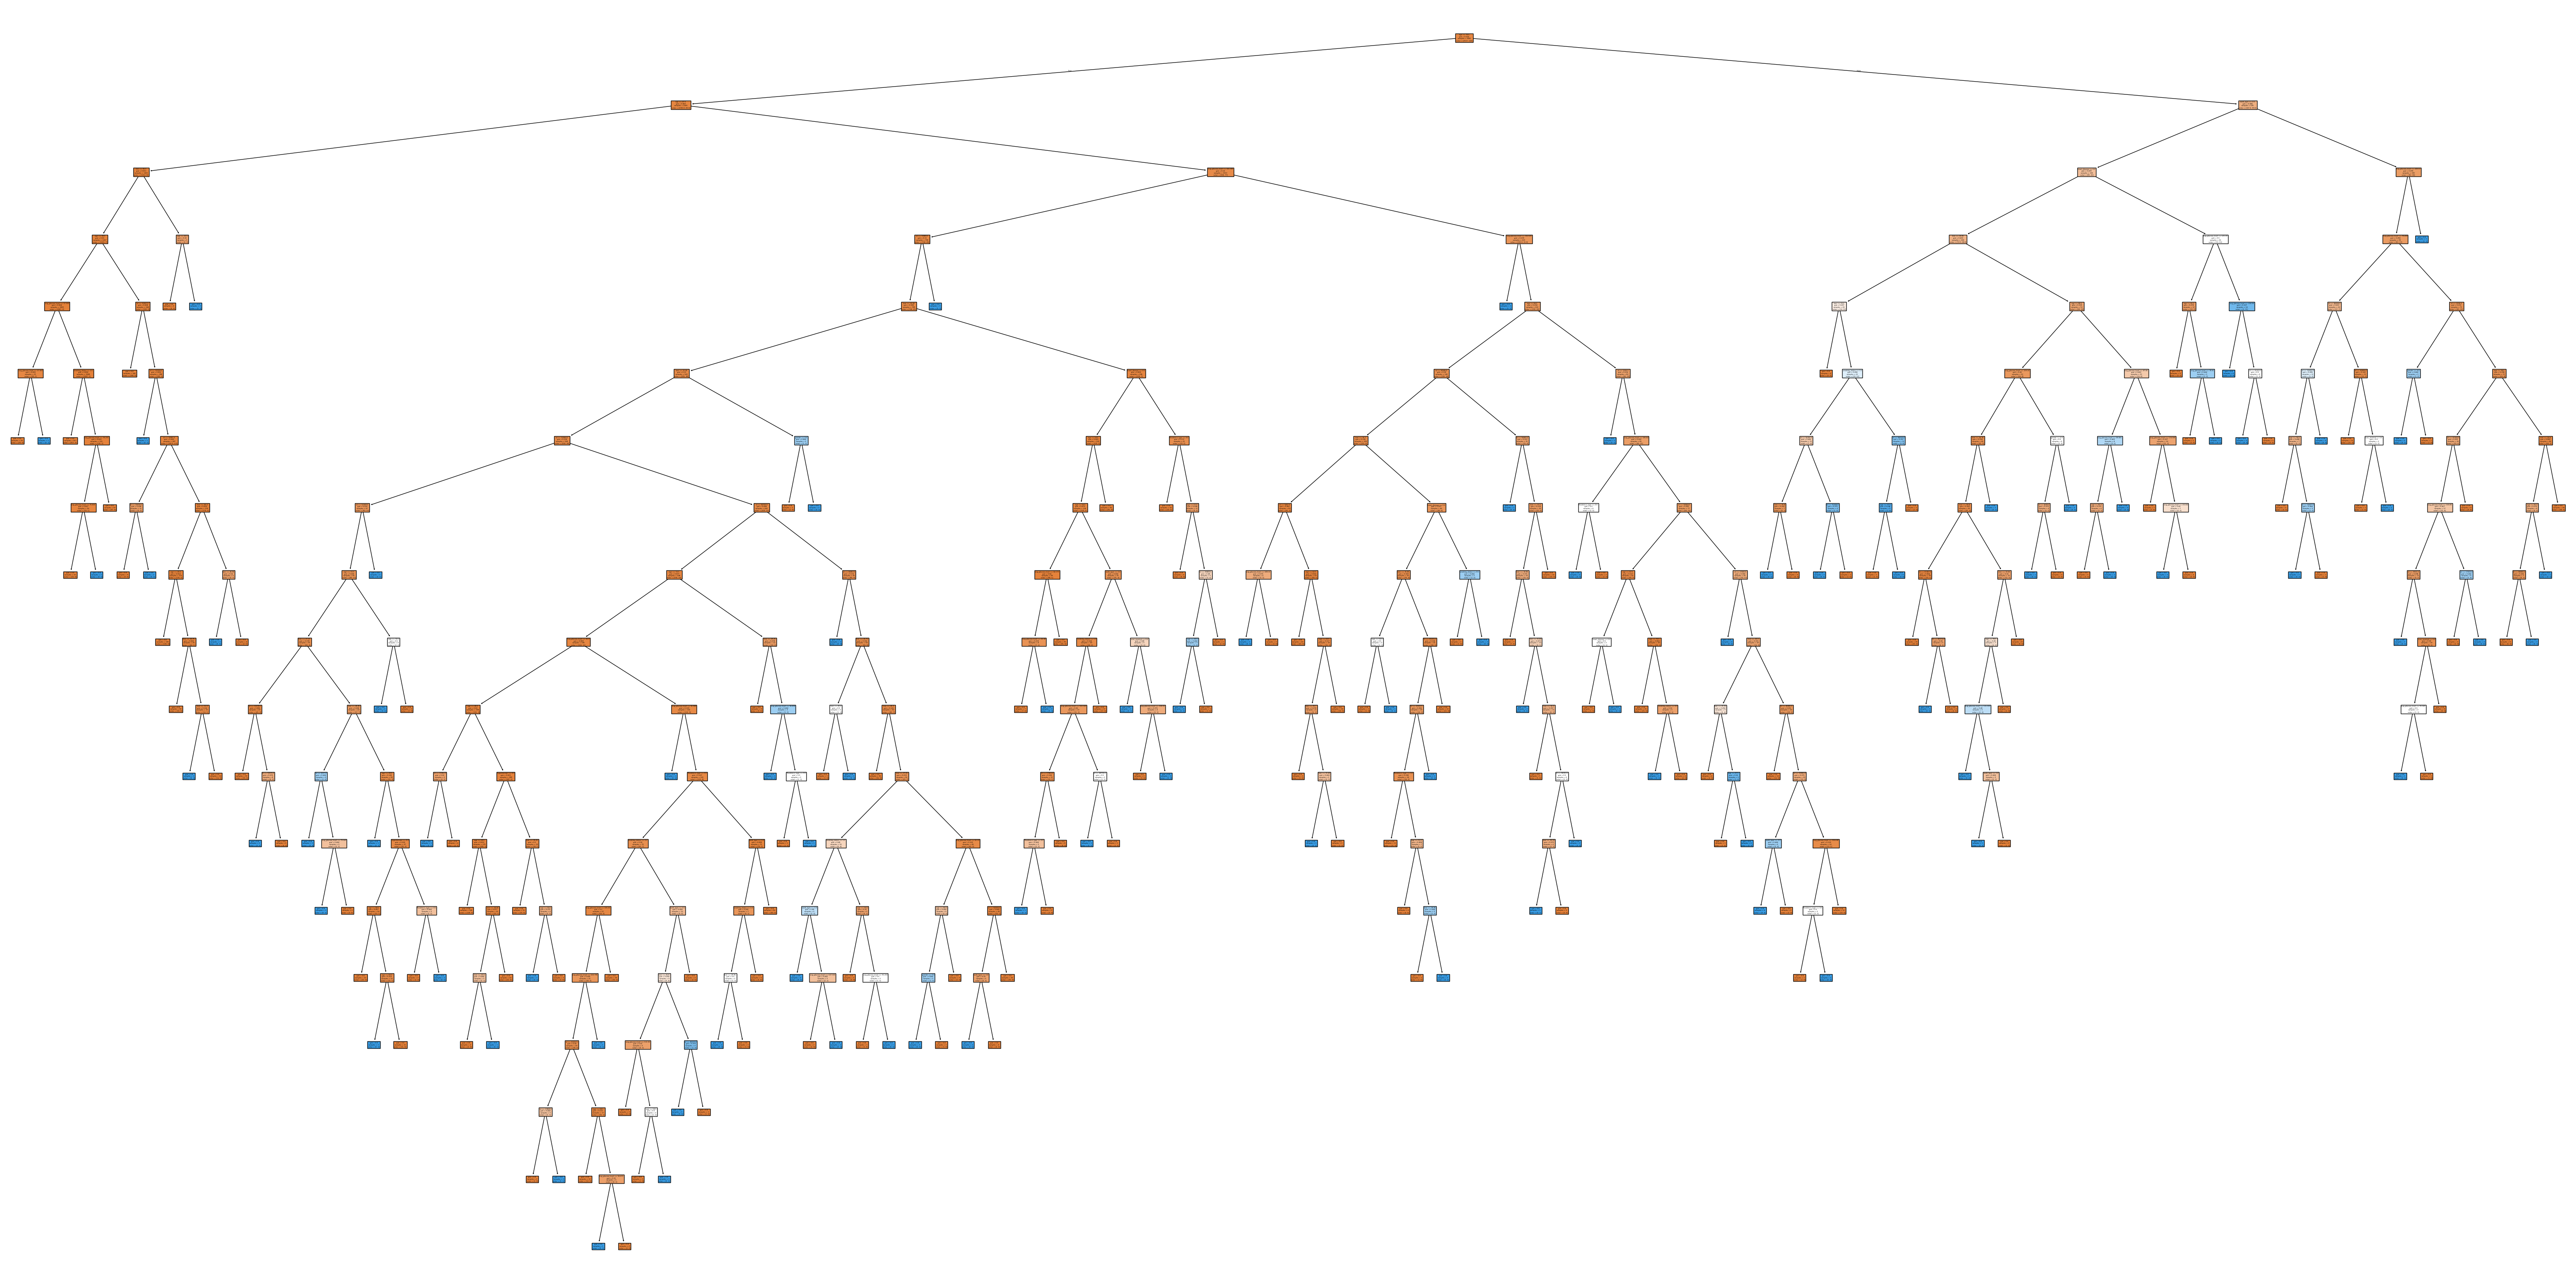

In [ ]:
#Decision tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import metrics
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = X_train[col].replace(' ', np.nan)
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce').fillna(0)

for col in X_test.select_dtypes(include=['object']).columns:
    X_test[col] = X_test[col].replace(' ', np.nan)
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce').fillna(0)

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
plt.figure(figsize=(80,40))
tree.plot_tree(clf, feature_names=list(X.columns), filled=True)
plt.show()
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9123575810692375


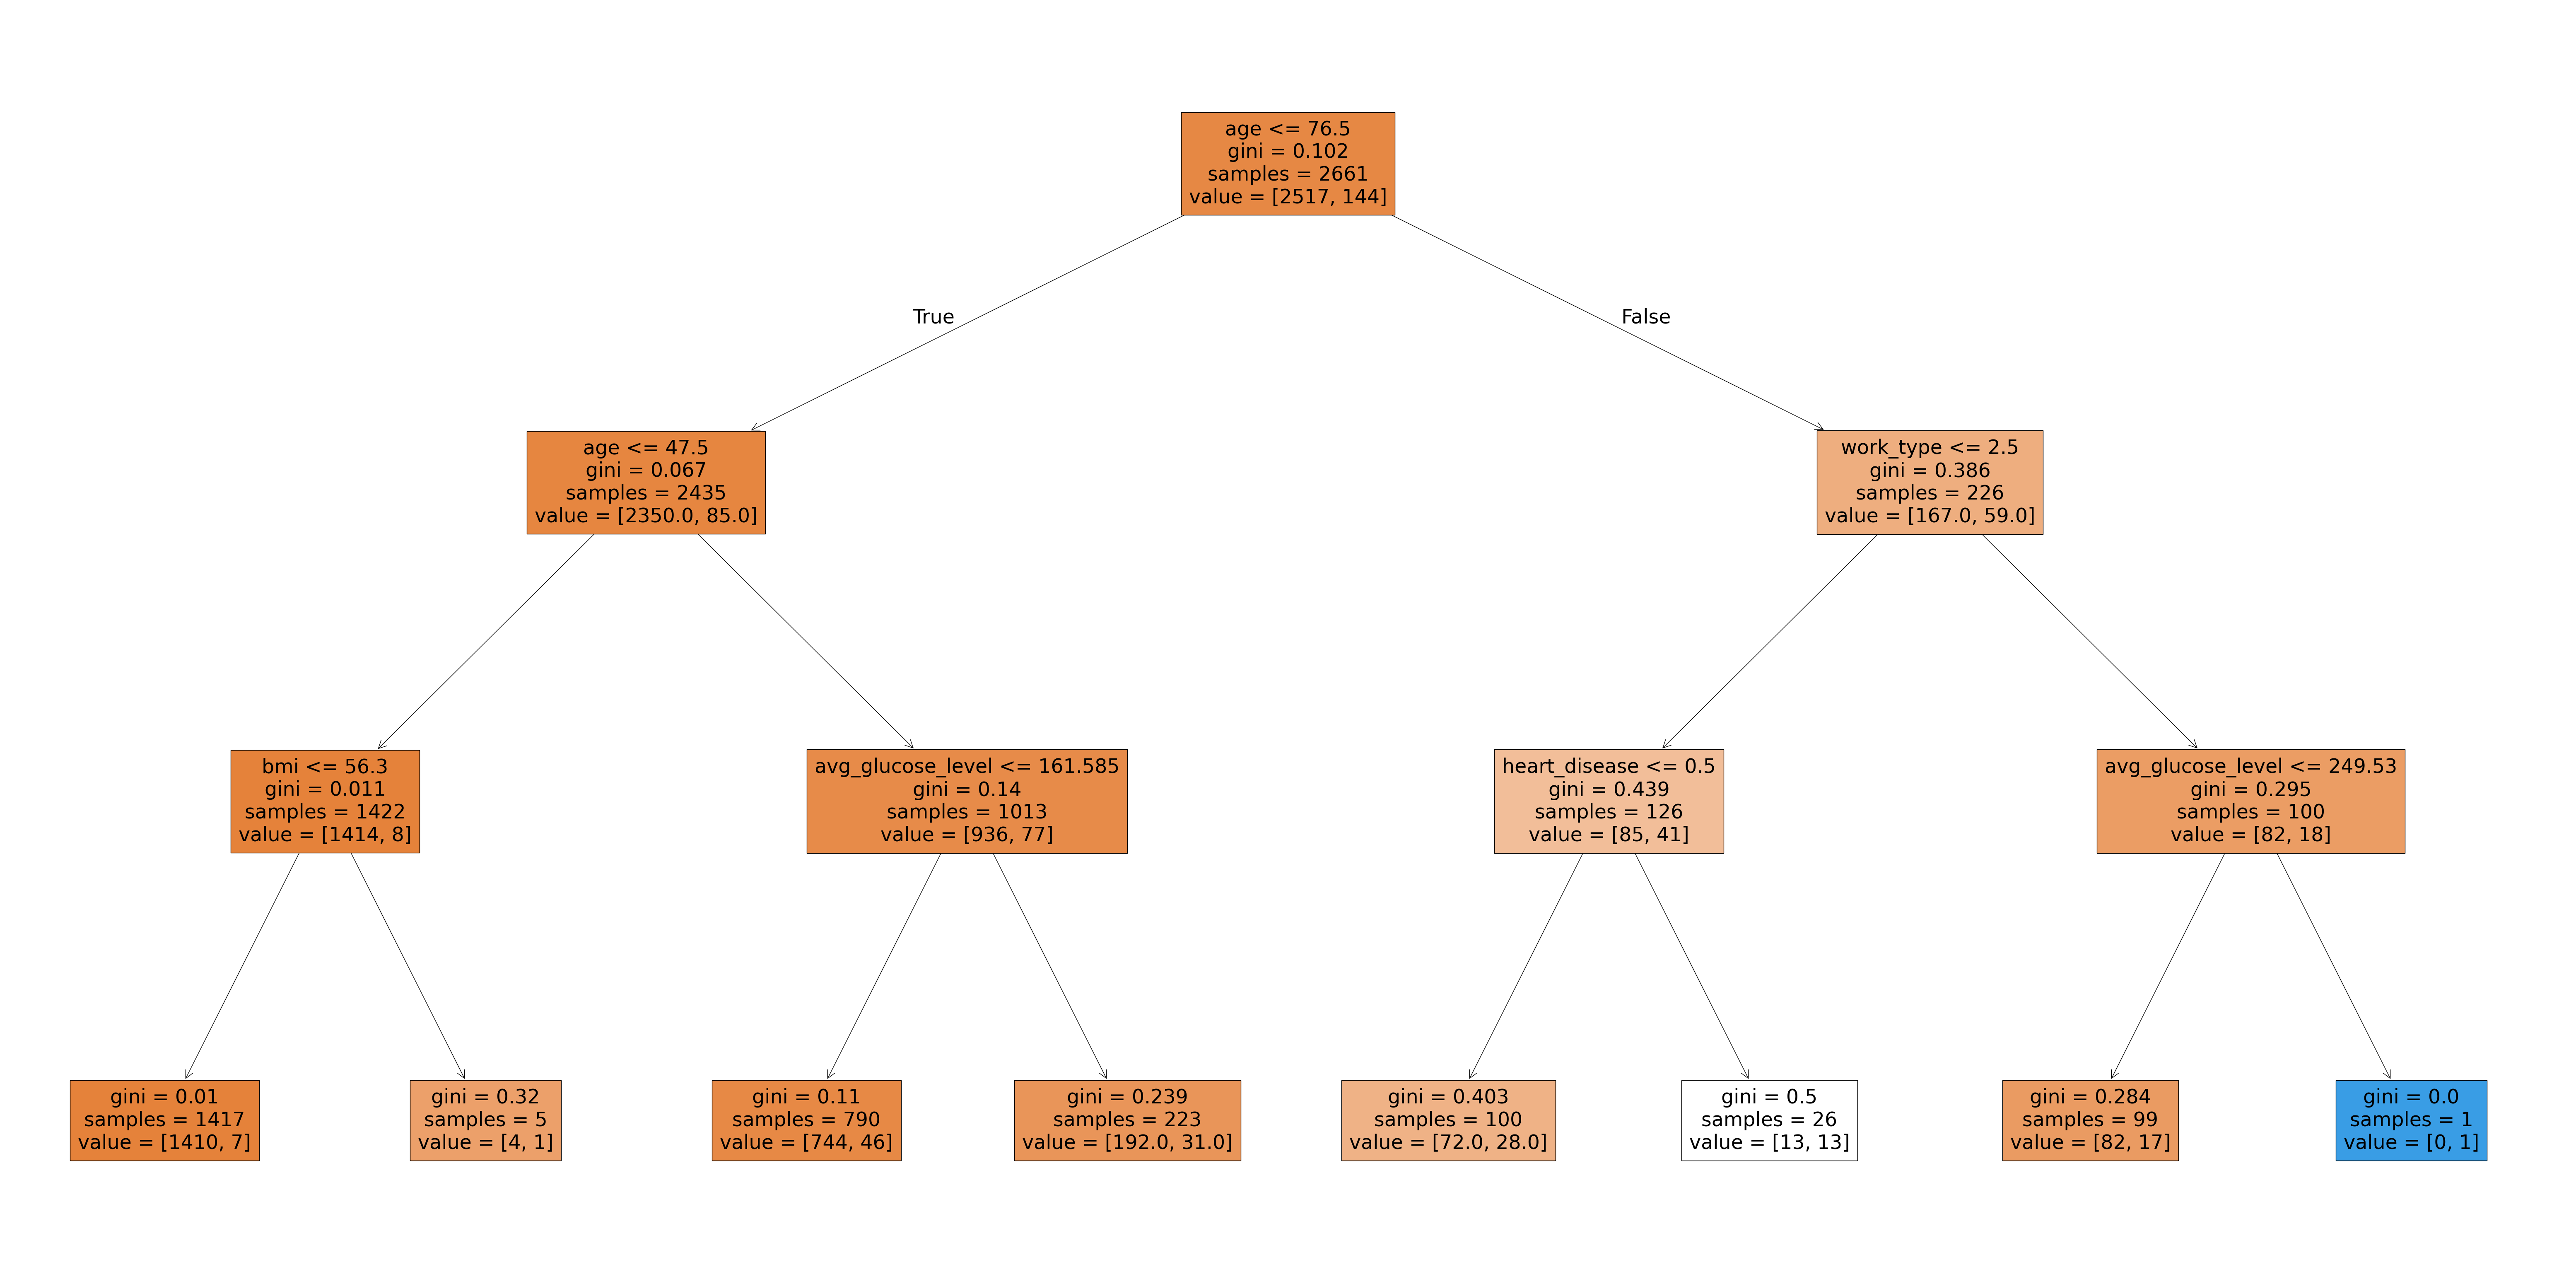

In [ ]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
plt.figure(figsize=(80,40))
tree.plot_tree(clf, feature_names=list(X.columns), filled=True)
plt.show()

In [ ]:
# Naive Bayes Algorithm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X=df.drop('stroke',axis=1)
y=df['stroke']
le=LabelEncoder()
y=le.fit_transform(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
nb_classifier=GaussianNB()
nb_classifier.fit(X_train,y_train)
y_pred=nb_classifier.predict(X_test)
accuracy=(y_pred==y_test).mean()
print('Accuracy:',accuracy)

Accuracy: 0.911957950065703


In [ ]:
# Support Vector Machine algorithm
from sklearn.svm import SVC
X=df.drop('stroke',axis=1)
y=df['stroke']
le=LabelEncoder()
y=le.fit_transform(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
svm_classifier=SVC()
svm_classifier.fit(X_train,y_train)
y_pred=svm_classifier.predict(X_test)
accuracy=(y_pred==y_test).mean()
print('Accuracy:',accuracy)

Accuracy: 0.938239159001314


In [ ]:
#Logistic Regression algorithm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

X = df.drop('stroke', axis=1)  # Features
y = df['stroke']  # Target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9369250985545335


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC()
}

results = {}
for name, model in models.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

for name, accuracy in results.items():
    print(f"{name}: Accuracy = {accuracy}")

best_model = max(results, key=results.get)
print(f"\nThe best performing model out of all models is: {best_model} (Accuracy = {results[best_model]})")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.9369250985545335
Decision Tree: Accuracy = 0.9040735873850198
Naive Bayes: Accuracy = 0.911957950065703
Support Vector Machine: Accuracy = 0.938239159001314

The best performing model out of all models is: Support Vector Machine (Accuracy = 0.938239159001314)
